In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from scipy.spatial.distance import pdist

In [2]:
# importing the dataset
df_car = pd.read_csv("cars-dataset.csv")

# Checking the info, shape, and data types

In [3]:
# checking the loaded data
df_car.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
df_car.tail()

,car name,cyl,disp,hp,wt,acc,yr,mpg
393,ford mustang gl,4,140.0,86,2790,15.6,82,27.0
394,vw pickup,4,97.0,52,2130,24.6,82,44.0
395,dodge rampage,4,135.0,84,2295,11.6,82,32.0
396,ford ranger,4,120.0,79,2625,18.6,82,28.0
397,chevy s-10,4,119.0,82,2720,19.4,82,31.0


In [5]:
# checking the shape of the dataset
df_car.shape

(398, 8)

In [6]:
# checking the column info
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car name  398 non-null    object 
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   mpg       398 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [7]:
# checking the datatypes of the columns
df_car.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [8]:
## the dataset has 398 datapoints and 8 features.
## datatypes of the columns show that there are 3 columns of float, 3 columns of integer and 2 columns of object type.
## info provides the information that there seems to be no columns with null values, since all the columns are having 398 as values count.
## there is an observation where the hp column datatype is shown as object. This is due to the presence of "?" character in the column.

# Check for missing values

In [9]:
# checking for missing values
df_car.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [10]:
df_car.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [11]:
# there seems to be no missing values in the dataset.

# Check for wrong data

In [12]:
# display the wrong records
df_car[df_car.hp == "?"]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [13]:
# replace the wrong values in the dataset with nan for imputation
df_car_enh = df_car
df_car_enh = df_car_enh.replace("?", np.nan)
df_car_enh = df_car_enh.drop('car name', axis=1)

In [14]:
# using KNNImputer for imputation
imputer = KNNImputer(n_neighbors=2)

In [15]:
# getting the imputted data into a dataframe
df_filled = imputer.fit_transform(df_car_enh)
df_filled = pd.DataFrame(df_filled, columns=df_car_enh.columns)

In [16]:
# getting the indices of the original data where the values for hp is "?"
idx = df_car[df_car.hp == "?"].index

In [17]:
# checking the imputed values after KNNImputer
df_filled[df_filled.index.isin(idx)]

,cyl,disp,hp,wt,acc,yr,mpg
32,4.0,98.0,65.5,2046.0,19.0,71.0,25.0
126,6.0,200.0,97.5,2875.0,17.0,74.0,21.0
330,4.0,85.0,60.0,1835.0,17.3,80.0,40.9
336,4.0,140.0,104.0,2905.0,14.3,80.0,23.6
354,4.0,100.0,63.0,2320.0,15.8,81.0,34.5
374,4.0,151.0,85.5,3035.0,20.5,82.0,23.0


In [18]:
# assigning the imputed values to the original dataset
df_car.hp = df_filled.hp
df_car[df_car.index.isin(idx)]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,65.5,2046,19.0,71,25.0
126,ford maverick,6,200.0,97.5,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,60.0,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,104.0,2905,14.3,80,23.6
354,renault 18i,4,100.0,63.0,2320,15.8,81,34.5
374,amc concord dl,4,151.0,85.5,3035,20.5,82,23.0


In [19]:
# checking the original dataset if the hp column has been rectified
df_car.dtypes

car name     object
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

# Visual Analysis

In [20]:
# checking the statistical inference of the dataset
df_car.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.089196,38.382294,46.0,75.000,92.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [21]:
## the range for the attributes disp, hp and wt is very high. 
## disp attribute mean is greater than the median which indicates the right skewed. The bigger difference shows there might be outliers.
## hp and wt also has mean greater than the median showing right skewed.
## acc and yr seems to be having a normal distribution, as the mean and the median are almost equal.
## the dataset has the car in the yr range of '76 - '82.
## the least mpg for the car is 9 and the highest is 46.

In [22]:
# There are 3 multi-valued discrete features - 'cyl', 'yr'
# and 4 continuous features - 'disp', 'hp', 'acc', 'mpg', 'wt'

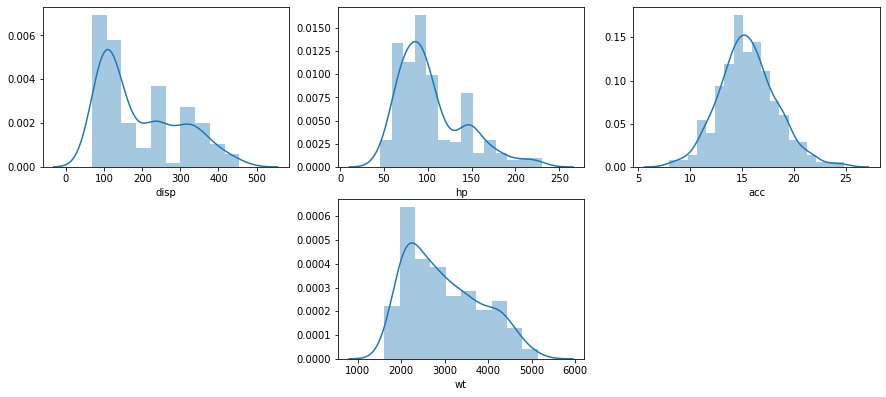

In [23]:
# univariate visual analysis for continuous features

plt.figure(figsize=(15,10))

# disp
plt.subplot(3,3,1)
sns.distplot(df_car['disp'])

#hp
plt.subplot(3,3,2)
sns.distplot(df_car['hp'])

#acc
plt.subplot(3,3,3)
sns.distplot(df_car['acc'])

#wt
plt.subplot(3,3,5)
sns.distplot(df_car['wt'])

plt.show()

In [24]:
## disp is having right skewed and long tailed. There are minumum of three peaks inferring to clusters. The range of this attribute is also high.
## hp attribute is also right skewed and can see the presence of clusters.
## acc seems to be having a normal distribution.
## wt is right skewed and this attribute is also inferring to clusters.
## the long tailed in the above attributes indicates the presence of outliers which needs to be treated.
## the presence of peaks infers that the clusters can be determined for this dataset.

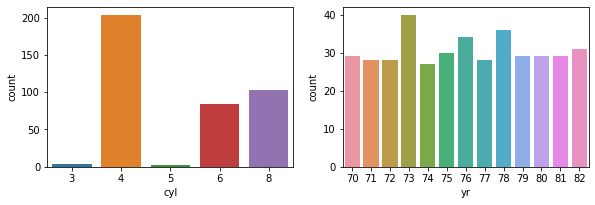

In [25]:
# univariate visual analysis for discrete features

plt.figure(figsize=(15,10))

#cyl
plt.subplot(3,3,1)
sns.countplot(df_car['cyl'])

#yr
plt.subplot(3,3,2)
sns.countplot(df_car['yr'])

plt.show()

In [26]:
## most number of vehicles seems to be of 4 cyclinders. Vehicles with 3 and 5 cyclinders are very less in count.
## the cars belonging to '73, 76,'78 has more count and the cars belonging to other years are have their count with marginal difference.

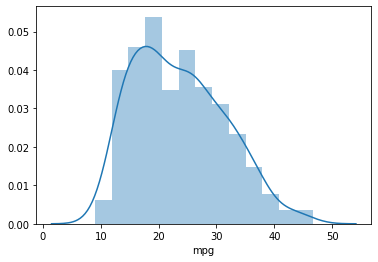

In [27]:
# distribution of mpg attribute
sns.distplot(df_car.mpg, kde=True)
plt.show()

In [28]:
# the distribution seems to be right skewed. 
# also see the presence of peaks or clusters.

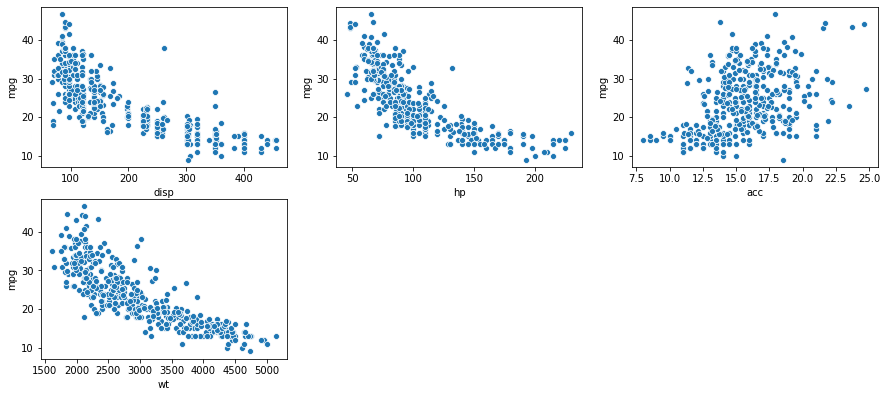

In [29]:
# checking the relationship between 'disp', 'hp', 'acc', 'wt' vs 'mpg'

plt.figure(figsize=(15,10))

# disp
plt.subplot(3,3,1)
sns.scatterplot(df_car['disp'], df_car['mpg'])

#hp
plt.subplot(3,3,2)
sns.scatterplot(df_car['hp'], df_car['mpg'])

#acc
plt.subplot(3,3,3)
sns.scatterplot(df_car['acc'], df_car['mpg'])

#wt
plt.subplot(3,3,4)
sns.scatterplot(df_car['wt'], df_car['mpg'])


plt.show()

In [30]:
# disp, hp and wt are showing a negative correlation with the mpg.
# acc seems to be not having a good correlation with mpg.

In [31]:
# checking the correlation of the data
df_car.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.842892,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.897690,0.932824,-0.543684,-0.370164,-0.804203
hp,0.842892,0.897690,1.000000,0.865223,-0.688689,-0.414845,-0.778331
wt,0.896017,0.932824,0.865223,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.688689,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.414845,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.778331,-0.831741,0.420289,0.579267,1.000000


In [32]:
# removing the car name attribute
df_car = df_car.drop(['car name'],axis=1)

df_car.sample(10)

,cyl,disp,hp,wt,acc,yr,mpg
65,8,351.0,153.0,4129,13.0,72,14.0
344,4,86.0,64.0,1875,16.4,81,39.0
329,4,91.0,67.0,1850,13.8,80,44.6
164,6,231.0,110.0,3039,15.0,75,21.0
159,8,351.0,148.0,4657,13.5,75,14.0
188,8,318.0,150.0,4190,13.0,76,16.0
253,6,200.0,95.0,3155,18.2,78,20.5
25,8,360.0,215.0,4615,14.0,70,10.0
70,8,400.0,190.0,4422,12.5,72,13.0
250,8,318.0,140.0,3735,13.2,78,19.4


In [33]:
# copy of the dataframe
df_car_copy = df_car.copy(deep=True)

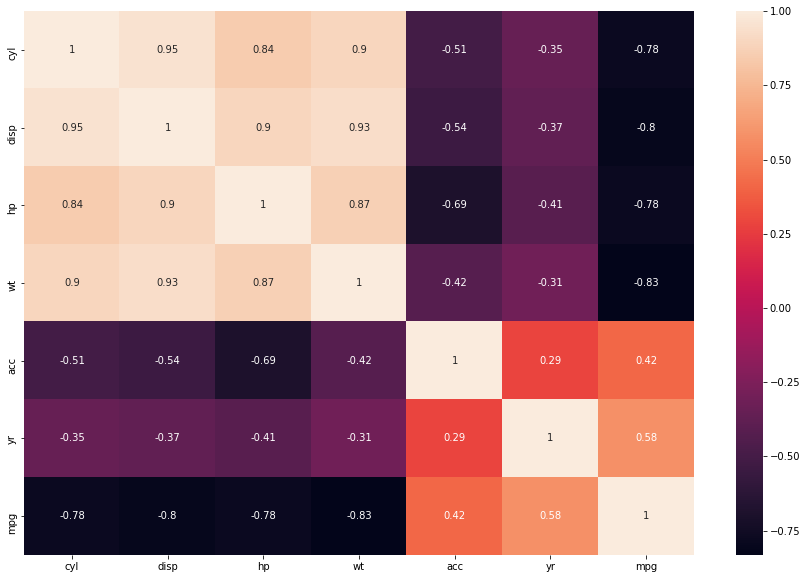

In [34]:
# heatmap analysis
plt.figure(figsize=(15,10))
sns.heatmap(df_car.corr(), annot=True)
plt.show()

In [35]:
## cyl, disp, hp and wt are having high mulitcolinearity.
## targert attribute mpg is having good collinearity with cyl, disp, hp and wt.

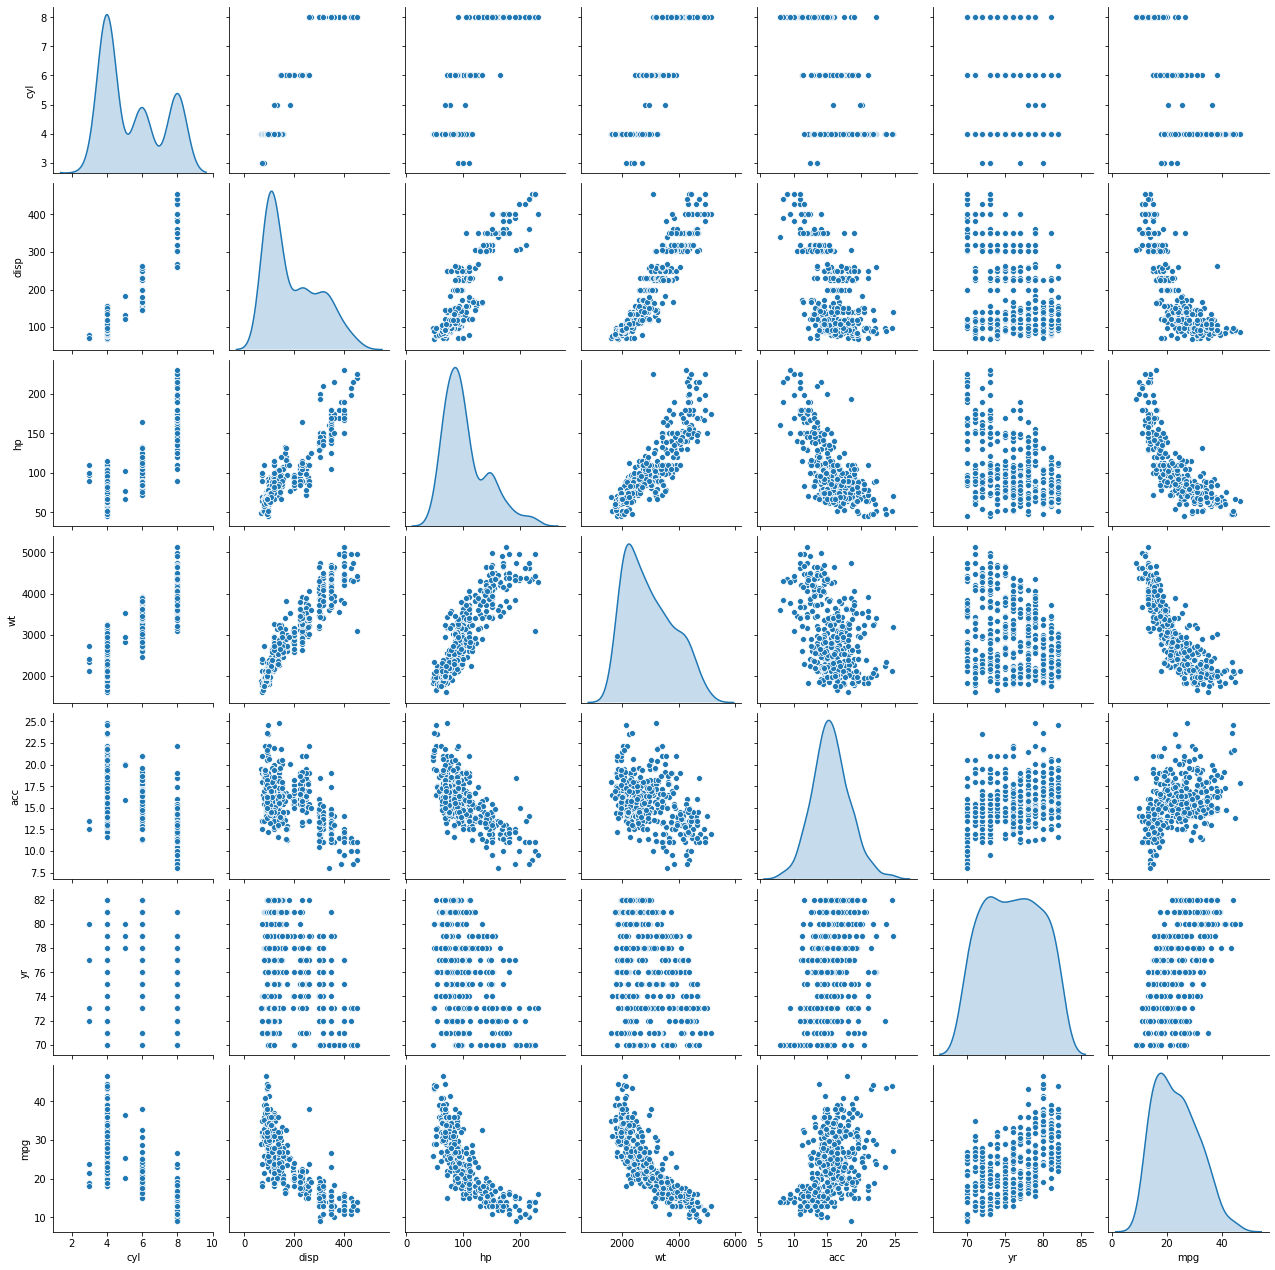

In [36]:
# multivariate analysis for the data
sns.pairplot(df_car,diag_kind='kde')
plt.show()

In [37]:
## disp vs mpg - as the disp increases the mpg is seen to be decreasing, showing a negative correlation.
## hp vs mpg - as the hp increases the mpg is seen to be decreasing, showing a negative correlation.
## wt vs mpg - as the wt increases the mpg is seen to be decreasing, showing a negative correlation.
## cyl vs mpg - though the segmentation is not that clear, there seems to be trend as the cyl increases it tends to decrease in the mpg.
## acc vs mpg - there is not much inference from this plot since datapoints are scattered and cannot distinguish the correlation.
## also from the diagonals there seems to be minimum of three clusters. The clusters should be between 3 to 6.

In [38]:
#df_car = df_car_copy

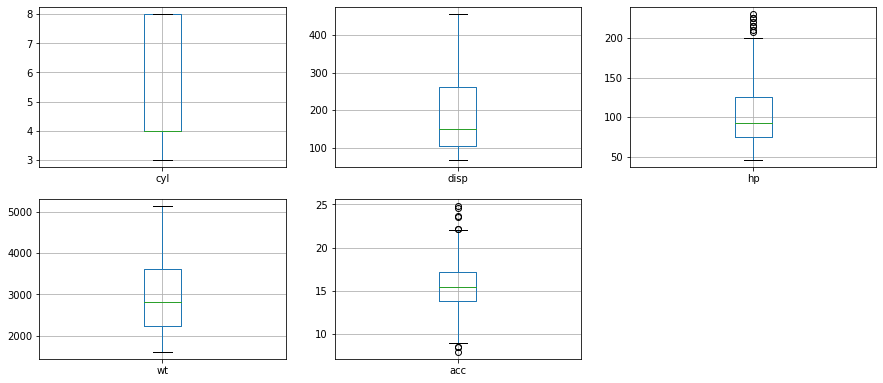

In [39]:
# boxplot analysis
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
df_car.boxplot('cyl')

plt.subplot(3,3,2)
df_car.boxplot('disp')

plt.subplot(3,3,3)
df_car.boxplot('hp')

plt.subplot(3,3,4)
df_car.boxplot('wt')

plt.subplot(3,3,5)
df_car.boxplot('acc')

plt.show()

In [40]:
## there are outliers for the hp and acc attributes.

In [41]:
# determining the inter quartile range
Q3 = df_car.quantile(0.75)
Q1 = df_car.quantile(0.25)
IQR = Q3 - Q1

IQR

cyl        4.00
disp     157.75
hp        50.00
wt      1384.25
acc        3.35
yr         6.00
mpg       11.50
dtype: float64

In [42]:
# removing the outliers
df_car = df_car[~((df_car < (Q1 - 1.5 * IQR)) |(df_car > (Q3 + 1.5 * IQR))).any(axis=1)]
df_car.shape

(379, 7)

In [43]:
#df_car_log = np.log(df_car)

In [44]:
#plt.figure(figsize=(15,10))
#plt.subplot(3,3,1)
#df_car_log.boxplot('cyl')
#
#plt.subplot(3,3,2)
#df_car_log.boxplot('disp')
#
#plt.subplot(3,3,3)
#df_car_log.boxplot('hp')
#
#plt.subplot(3,3,4)
#df_car_log.boxplot('wt')
#
#plt.subplot(3,3,5)
#df_car_log.boxplot('acc')
#
#plt.subplot(3,3,6)
#df_car_log.boxplot('yr')
#
#plt.show()

In [45]:
#df_car_log.describe().T

In [46]:
#df_car.skew()

In [47]:
#df_car_log.skew()

In [48]:
#Q3 = df_car_log.quantile(0.75)
#Q1 = df_car_log.quantile(0.25)
#IQR = Q3 - Q1

In [49]:
#df_car_log[((df_car_log < (Q1 - 1.5 * IQR)) |(df_car_log > (Q3 + 1.5 * IQR))).any(axis=1)]

In [50]:
# Creating a standardized dataframe
stdScaler = StandardScaler()
scaled_df = pd.DataFrame(stdScaler.fit_transform(df_car), columns=df_car.columns)
scaled_df.sample(10)

,cyl,disp,hp,wt,acc,yr,mpg
36,1.567615,2.162390,2.193723,2.670934,-1.474797,-1.413789,-1.413047
378,-0.835322,-0.701640,-0.580913,-0.264506,1.554954,1.618148,0.974994
161,0.366147,-0.171642,-0.133391,0.055724,-0.451233,-0.311266,-0.749702
121,0.366147,0.715087,0.254462,0.841743,0.981758,-0.586897,-1.015040
39,0.366147,0.633548,-0.043886,0.417196,-0.246520,-1.413789,-0.617033
241,-0.835322,-0.487602,-0.401904,-0.264506,-0.082749,0.515626,0.192247
216,1.567615,1.652776,2.044549,1.488267,-1.720453,0.239995,-1.081374
211,0.366147,0.633548,0.254462,0.705888,0.326676,0.239995,-0.816037
70,-0.835322,-0.671063,-0.461573,-0.658728,0.162906,-1.138158,-0.219026
0,1.567615,1.214508,0.851158,0.686480,-1.474797,-1.689419,-0.749702


# Clustering

In [51]:
# Create K Means cluster and store the result in the object k_means
model_Kmeans =KMeans(n_clusters=3, random_state=7)

In [52]:
# Fit K means on the scaled_df
model_Kmeans.fit(scaled_df)
print('The WSS for k means = 3 is' , model_Kmeans.inertia_)
predict = model_Kmeans.predict(scaled_df)


The WSS for k means = 3 is 919.4807577544487


In [53]:
# Checking the value of k with the elbow method
wss =[] 
k_range = range(1,10)
for k in k_range:
    model=KMeans(n_clusters=k,n_init = 15, random_state=2)
    model.fit(scaled_df)
    wss.append(model.inertia_)
    print('The WSS for k means =',k,'is' , model.inertia_)

The WSS for k means = 1 is 2653.0
The WSS for k means = 2 is 1270.4502918672563
The WSS for k means = 3 is 919.4807577544487
The WSS for k means = 4 is 712.2100572479836
The WSS for k means = 5 is 632.9404113228884
The WSS for k means = 6 is 579.8109843540958
The WSS for k means = 7 is 526.334844215006
The WSS for k means = 8 is 478.9496839980028
The WSS for k means = 9 is 433.50689591991556


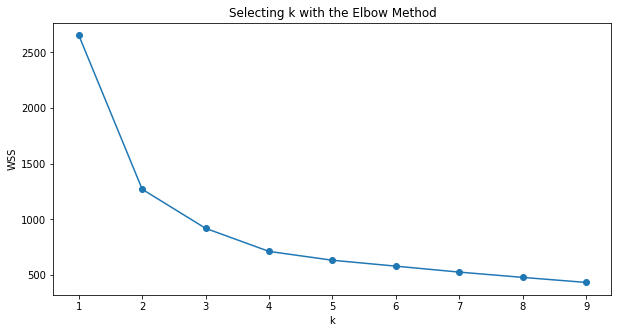

In [54]:
# plotting the WSS with the k to find the optimal k
plt.figure(figsize=(10,5))
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Selecting k with the Elbow Method')
plt.plot(k_range, wss, marker = "o" )
plt.show()

In [55]:
## the optimal value seems to be at k = 3 or 4

In [56]:
# Create K Means cluster for 4 and store the result in the object k_means
model_Kmeans_4 =KMeans(n_clusters=4, random_state=7)

In [57]:
model_Kmeans_4.fit(scaled_df)
print('The WSS for k means = 4 is' , model_Kmeans_4.inertia_)
predict = model_Kmeans_4.predict(scaled_df)
predict

The WSS for k means = 4 is 712.2100572479836


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0,
       2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 0, 0, 3, 2, 2, 2, 2, 0, 3, 0, 0, 0, 1, 0, 2, 2,
       1, 1, 1, 1, 3, 3, 3, 0, 3, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 3,
       0, 0, 0, 3, 3, 3, 3, 2, 0, 0, 3, 3, 3, 3, 3, 2, 1, 1, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 0, 2,
       3, 3, 2, 2, 3, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2,

In [58]:
# framing dataframe for the labels
df_car['labels'] = model_Kmeans_4.labels_
df_car['labels'] = df_car['labels'].astype('category')
df_car.sample(10)

,cyl,disp,hp,wt,acc,yr,mpg,labels
272,4,151.0,85.0,2855,17.6,78,23.8,0
367,4,112.0,88.0,2605,19.6,82,28.0,3
251,8,302.0,139.0,3570,12.8,78,20.2,1
83,4,98.0,80.0,2164,15.0,72,28.0,0
163,6,225.0,95.0,3785,19.0,75,18.0,2
357,4,119.0,100.0,2615,14.8,81,32.9,3
231,8,400.0,190.0,4325,12.2,77,15.5,1
224,8,302.0,130.0,4295,14.9,77,15.0,1
204,4,85.0,70.0,1990,17.0,76,32.0,3
329,4,91.0,67.0,1850,13.8,80,44.6,3


In [59]:
# checking how the clusters are along with the dataset
df_car.groupby(['labels']).count()

,cyl,disp,hp,wt,acc,yr,mpg
labels,,,,,,,
0,96,96,96,96,96,96,96
1,85,85,85,85,85,85,85
2,88,88,88,88,88,88,88
3,110,110,110,110,110,110,110


In [60]:
# the k means with the cluster of 4 segmented the data as above.

In [61]:
# checking with heirarchical for k = 4
model_herirarchy_4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model_herirarchy_4.fit_predict(scaled_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 1, 1, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 3, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 1, 3,
       2, 1, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       3, 3, 2, 3, 3, 3, 3, 2, 0, 2, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 3, 0, 0, 1, 0, 2, 2,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0,
       0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [62]:
# framing dataframe for the labels
df_car['labels'] = model_herirarchy_4.labels_
df_car['labels'] = df_car['labels'].astype('category')
df_car.sample(10)

,cyl,disp,hp,wt,acc,yr,mpg,labels
144,4,76.0,52.0,1649,16.5,74,31.0,0
176,6,232.0,90.0,3211,17.0,75,19.0,2
256,6,225.0,100.0,3430,17.2,78,20.5,2
81,4,97.0,92.0,2288,17.0,72,28.0,3
82,4,120.0,97.0,2506,14.5,72,23.0,3
391,4,135.0,84.0,2370,13.0,82,36.0,0
142,4,79.0,67.0,1963,15.5,74,26.0,3
17,6,200.0,85.0,2587,16.0,70,21.0,2
163,6,225.0,95.0,3785,19.0,75,18.0,2
171,4,134.0,96.0,2702,13.5,75,24.0,3


In [63]:
df_car.groupby('labels').count()

,cyl,disp,hp,wt,acc,yr,mpg
labels,,,,,,,
0,134,134,134,134,134,134,134
1,88,88,88,88,88,88,88
2,84,84,84,84,84,84,84
3,73,73,73,73,73,73,73


In [64]:
# creating the linkage to build the dendrogram
Z = linkage(scaled_df, 'ward')
c, cop_dist = cophenet(Z, pdist(scaled_df))

c

0.7811650386836536

In [65]:
# cophentic correlation distance seems to be good.

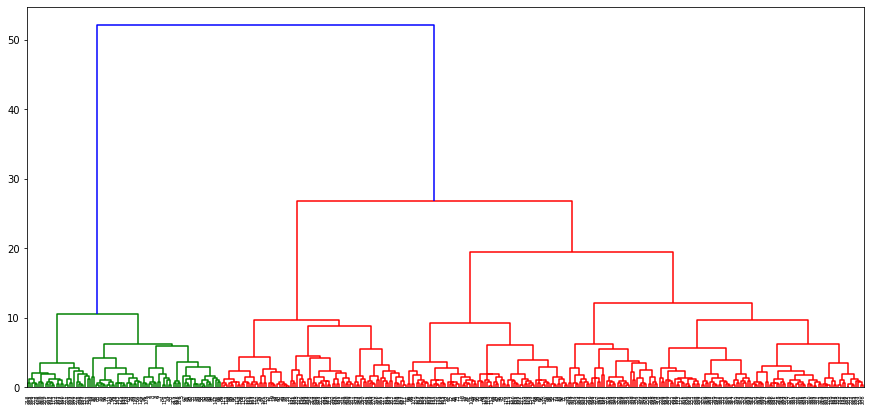

In [66]:
# dendogram to visually check the number of clusters 
plt.figure(figsize=(15, 7)) 
dendrogram(Z)
plt.show()

In [67]:
# the optimal value for the k = 4. 

In [68]:
# appending the labels to the dataset.
df_car_labels = df_car
df_car_labels['labels'] = model_herirarchy_4.labels_

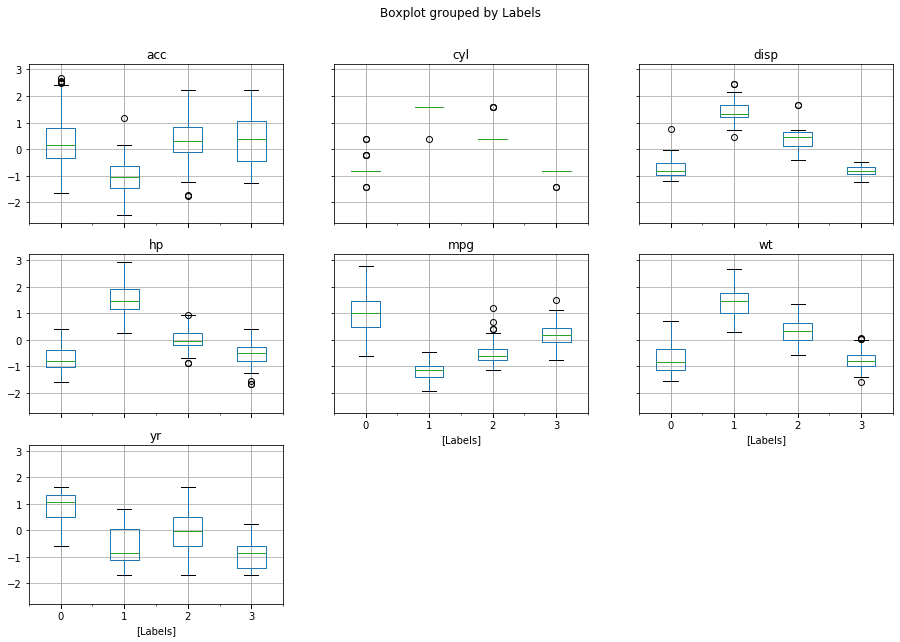

In [69]:
# visualizing the clusters
scaled_df['Labels'] = model_herirarchy_4.labels_
#df_car_labeled_h4.boxplot(by='labels', layout=(3,3), figsize=(15,10))
scaled_df.boxplot(by='Labels', layout=(3,3), figsize=(15,10))
plt.show()

In [70]:
# profiling the data
clust_profile=df_car_labels.groupby('labels').mean()
clust_profile['freq']=df_car_labels.labels.value_counts()
clust_profile

,cyl,disp,hp,wt,acc,yr,mpg,freq
labels,,,,,,,,
0,4.037313,113.111940,77.421642,2344.544776,16.334328,79.417910,31.099254,134
1,7.977273,336.488636,153.431818,4101.431818,13.025000,74.125000,14.890909,88
2,6.071429,221.976190,101.625000,3222.809524,16.327381,75.880952,19.750000,84
3,3.972603,106.541096,82.801370,2297.452055,16.530137,72.794521,25.027397,73


In [71]:
#Cluster 0 - Smaller cars, with less cyl, disp and hp and more acc. These cars have the highest mpg.
#Cluster 1 - Larger cars, with highest cyl, disp, hp and less acc. These cars have the least mpg.
#Cluster 2 - Medium cars, with moderate cyl, disp, hp and acc. These cars have the less mpg.
#Cluster 3 - Samllest cars, with less cyl, disp and hp and more acc. These cars have the more mpg.

Inference for the optimal k from k-means and heirarchical 

In [72]:
# with the k means from the elbow curve it looked like the optimal value could have been 3 or 4.
# from the heirarchical analysis, and the visual inference in the dendrogram, it can be decided that the optimum k value is 4.
# the k-means even though the optimum value was selected based on the elbow curve, the final clusters totally depend on the intial arbitrary selected centroids. Hence the datapoints may have be clustered indifferently.
# In heirarchical, as we are forming the clusters from each datapoint the cluster formation may be more optimal.

## Model building from Clusters

In [73]:
car_clusters = df_car_labels.groupby(['labels'])
df0 = car_clusters.get_group(0)
df1 = car_clusters.get_group(1)
df2 = car_clusters.get_group(2)
df3 = car_clusters.get_group(3)

Model 1 - Cluster 1

In [74]:
df0 = df0.drop('labels', axis=1)
df0_X = df0.drop(['mpg'], axis=1)
df0_y = df0['mpg']

print("Shape of the df0", df0.shape)
print("Shape of the df0_X", df0_X.shape)
print("Shape of the df0_y", df0_y.shape)

Shape of the df0 (134, 7)
Shape of the df0_X (134, 6)
Shape of the df0_y (134,)


In [75]:
# checking the features for this model
df0.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.475364,-0.048717,0.293431,0.238237,0.101912,0.085367
disp,0.475364,1.000000,0.595461,0.800545,0.000874,0.220935,-0.444494
hp,-0.048717,0.595461,1.000000,0.678543,-0.346418,0.047216,-0.680803
wt,0.293431,0.800545,0.678543,1.000000,0.210114,0.174534,-0.624403
acc,0.238237,0.000874,-0.346418,0.210114,1.000000,0.089252,0.061462
yr,0.101912,0.220935,0.047216,0.174534,0.089252,1.000000,0.293972
mpg,0.085367,-0.444494,-0.680803,-0.624403,0.061462,0.293972,1.000000


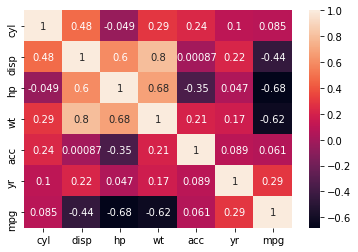

In [76]:
# checking the heatmap
sns.heatmap(df0.corr(), annot=True)
plt.show()

In [77]:
# spitting the dataset 
X_train_df0, X_test_df0, y_train_df0, y_test_df0 = train_test_split(df0_X, df0_y, test_size=0.20, random_state=0)

In [78]:
regression_model_df0 = LinearRegression()
regression_model_df0.fit(X_train_df0, y_train_df0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
coeff_df = pd.DataFrame({'Columns' :df0_X.columns, 'Coefficient' : regression_model_df0.coef_})  
coeff_df

,Columns,Coefficient
0,cyl,3.694573
1,disp,-0.010407
2,hp,-0.147819
3,wt,-0.005606
4,acc,-0.092164
5,yr,0.943862


In [80]:
regression_model_df0.intercept_

-31.20943870957194

In [81]:
#predicting the values
y_pred_df0 = regression_model_df0.predict(X_test_df0)
y_pred_df0

array([35.82615052, 30.87962302, 30.13055008, 31.85115005, 34.10562148,
       26.96604828, 27.66950477, 34.63102532, 33.23983558, 27.85246692,
       26.90087658, 37.43790172, 28.33698376, 33.2261889 , 24.73307521,
       36.84424545, 34.14384024, 38.95942983, 31.24546151, 29.85982628,
       21.81635049, 32.44266931, 29.09944793, 36.51745539, 29.82091069,
       30.92572135, 29.71806774])

In [82]:
# training score
scores = cross_val_score(regression_model_df0, X_train_df0, y_train_df0, cv=7)
np.mean(scores)

0.5845136871347523

In [83]:
# r2 score for the model
r2_score(y_test_df0, y_pred_df0)

0.636313551892264

In [84]:
#comparing the actual vs the predicted
df0_compare = pd.DataFrame({'Actual': y_test_df0, 'Predicted': y_pred_df0})
df0_compare.sample(10)

,Actual,Predicted
278,31.5,33.239836
236,25.5,24.733075
350,34.7,35.826151
373,24.0,28.336984
319,31.3,30.879623
293,31.9,34.631025
372,27.0,29.099448
345,35.1,38.959430
238,33.5,29.859826
276,21.6,21.816350


In [85]:
#evaluate the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df0, y_pred_df0))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df0, y_pred_df0))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df0, y_pred_df0)))

Mean Absolute Error: 2.3015505705257846
Mean Squared Error: 8.728694263552972
Root Mean Squared Error: 2.954436369860243


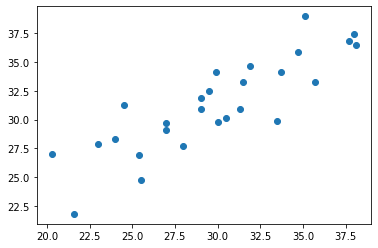

In [86]:
plt.scatter(y_test_df0, y_pred_df0)
plt.show()

Model 2 - Cluster 2

In [87]:
df1 = df1.drop('labels', axis=1)
df1_X = df1.drop(['mpg'], axis=1)
df1_y = df1['mpg']

print("Shape of the df0", df1.shape)
print("Shape of the df0_X", df1_X.shape)
print("Shape of the df0_y", df1_y.shape)

Shape of the df0 (88, 7)
Shape of the df0_X (88, 6)
Shape of the df0_y (88,)


In [88]:
# checking the features for this model
df1.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.287702,-0.065551,0.160028,-0.026395,-0.146921,-0.130434
disp,0.287702,1.000000,0.654781,0.608936,-0.482509,-0.305098,-0.425739
hp,-0.065551,0.654781,1.000000,0.514320,-0.343705,-0.424118,-0.538180
wt,0.160028,0.608936,0.514320,1.000000,0.193355,-0.220288,-0.596211
acc,-0.026395,-0.482509,-0.343705,0.193355,1.000000,0.323532,-0.056351
yr,-0.146921,-0.305098,-0.424118,-0.220288,0.323532,1.000000,0.562527
mpg,-0.130434,-0.425739,-0.538180,-0.596211,-0.056351,0.562527,1.000000


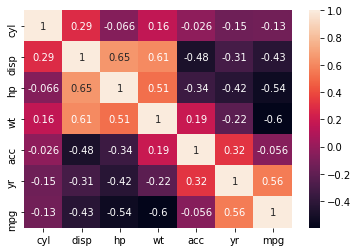

In [89]:
# heatmap 
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [90]:
# spitting the dataset 
X_train_df1, X_test_df1, y_train_df1, y_test_df1 = train_test_split(df1_X, df1_y, test_size=0.20, random_state=6)

In [91]:
regression_model_df1 = LinearRegression()
regression_model_df1.fit(X_train_df1, y_train_df1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
coeff_df = pd.DataFrame({'Columns' :df1_X.columns, 'Coefficient' : regression_model_df1.coef_})  
coeff_df

,Columns,Coefficient
0,cyl,-0.006915
1,disp,-0.009078
2,hp,-0.027441
3,wt,-0.001027
4,acc,-0.512664
5,yr,0.407642


In [93]:
regression_model_df1.intercept_

2.9782676799556196

In [94]:
#predicting the values
y_pred_df1 = regression_model_df1.predict(X_test_df1)
y_pred_df1

array([14.02628402, 12.37115197, 14.59466495, 15.35265957, 16.34683702,
       12.62373105, 14.01286446, 17.32405699, 15.07463477, 16.13777775,
       15.93258958, 13.98276375, 18.14956034, 14.50975365, 16.6557017 ,
       13.20756849, 15.04665635, 13.99092341])

In [95]:
# training score for the model
scores = cross_val_score(regression_model_df1, X_train_df1, y_train_df1, cv=4)
np.mean(scores)

0.4604418354080089

In [96]:
# r2 score for the model
r2_score(y_test_df1, y_pred_df1)

0.5745980372263836

In [97]:
#comparing the actual vs the predicted
df1_compare = pd.DataFrame({'Actual': y_test_df1, 'Predicted': y_pred_df1})
df1_compare.sample(10)

,Actual,Predicted
86,14.0,16.137778
65,14.0,13.982764
96,13.0,15.046656
189,15.5,16.655702
136,16.0,15.074635
92,13.0,14.012864
103,11.0,12.623731
230,15.5,16.346837
88,14.0,14.594665
156,16.0,14.509754


In [98]:
#evaluate the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df1, y_pred_df1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df1, y_pred_df1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df1, y_pred_df1)))

Mean Absolute Error: 1.0307516857907424
Mean Squared Error: 1.5860271881840913
Root Mean Squared Error: 1.259375713670901


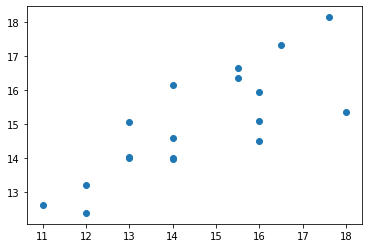

In [99]:
plt.scatter(y_test_df1, y_pred_df1)
plt.show()

Model 3 - Cluster 3

In [100]:
df2 = df2.drop('labels', axis=1)
df2_X = df2.drop(['mpg'], axis=1)
df2_y = df2['mpg']

print("Shape of the df0", df2.shape)
print("Shape of the df0_X", df2_X.shape)
print("Shape of the df0_y", df2_y.shape)

Shape of the df0 (84, 7)
Shape of the df0_X (84, 6)
Shape of the df0_y (84,)


In [101]:
# checking the features of the model
df2.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.511161,0.184791,0.365356,0.206127,0.189054,0.151308
disp,0.511161,1.000000,-0.169063,0.583436,0.493912,-0.114929,-0.298994
hp,0.184791,-0.169063,1.000000,0.111282,-0.454388,0.280818,0.263685
wt,0.365356,0.583436,0.111282,1.000000,0.653493,0.145754,-0.441055
acc,0.206127,0.493912,-0.454388,0.653493,1.000000,0.039185,-0.493179
yr,0.189054,-0.114929,0.280818,0.145754,0.039185,1.000000,0.452410
mpg,0.151308,-0.298994,0.263685,-0.441055,-0.493179,0.452410,1.000000


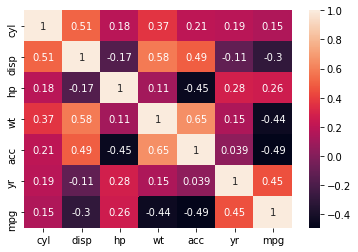

In [102]:
# heatmap
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [103]:
# spitting the dataset 
X_train_df2, X_test_df2, y_train_df2, y_test_df2 = train_test_split(df2_X, df2_y, test_size=0.20, random_state=8)

In [104]:
regression_model_df2 = LinearRegression()
regression_model_df2.fit(X_train_df2, y_train_df2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
coeff_df = pd.DataFrame({'Columns' :df2_X.columns, 'Coefficient' : regression_model_df2.coef_})  
coeff_df

,Columns,Coefficient
0,cyl,2.089804
1,disp,0.004160
2,hp,0.015316
3,wt,-0.004154
4,acc,-0.424627
5,yr,0.487762


In [106]:
regression_model_df2.intercept_

-12.098175750979909

In [107]:
#predicting the values
y_pred_df2= regression_model_df2.predict(X_test_df2)
y_pred_df2

array([18.62110326, 16.21925639, 15.99255739, 25.02856619, 15.98237146,
       19.40256425, 21.7007556 , 18.79312249, 17.87172476, 19.42160693,
       25.0996151 , 16.18246246, 19.13782925, 19.46930589, 21.06127202,
       15.62801943, 21.17258144])

In [108]:
# r2 score for the model
scores = cross_val_score(regression_model_df2, X_train_df2, y_train_df2, cv=5)
np.mean(scores)

0.21582828515374342

In [109]:
# r2 score for the model
r2_score(y_test_df2, y_pred_df2)

0.6868392522616589

In [110]:
#comparing the actual vs the predicted
df2_compare = pd.DataFrame({'Actual': y_test_df2, 'Predicted': y_pred_df2})
df2_compare.sample(10)

,Actual,Predicted
361,25.4,25.028566
227,19.0,17.871725
133,16.0,16.182462
363,22.4,21.700756
162,15.0,16.219256
210,19.0,21.061272
200,18.0,15.982371
389,22.0,25.099615
101,23.0,19.469306
24,21.0,19.421607


In [111]:
#evaluate the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df2, y_pred_df2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df2, y_pred_df2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df2, y_pred_df2)))

Mean Absolute Error: 1.3279344294835722
Mean Squared Error: 2.570843854703164
Root Mean Squared Error: 1.60338512363785


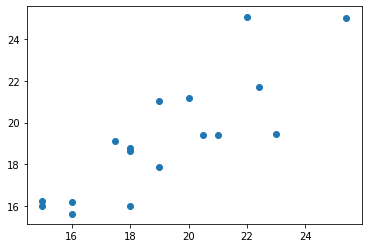

In [112]:
plt.scatter(y_test_df2, y_pred_df2)
plt.show()

Model 4 - Cluster 4

In [113]:
df3 = df3.drop('labels', axis = 1)
df3_X = df3.drop(['mpg'], axis=1)
df3_y = df3['mpg']

print("Shape of the df0", df3.shape)
print("Shape of the df0_X", df3_X.shape)
print("Shape of the df0_y", df3_y.shape)

Shape of the df0 (73, 7)
Shape of the df0_X (73, 6)
Shape of the df0_y (73,)


In [114]:
# checking the features
df3.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.321750,-0.124135,0.040896,0.240314,0.028351,0.319564
disp,0.321750,1.000000,0.452431,0.690021,-0.176229,0.072799,-0.524519
hp,-0.124135,0.452431,1.000000,0.682553,-0.684763,-0.021715,-0.489942
wt,0.040896,0.690021,0.682553,1.000000,-0.328852,0.251892,-0.657490
acc,0.240314,-0.176229,-0.684763,-0.328852,1.000000,-0.013914,0.215326
yr,0.028351,0.072799,-0.021715,0.251892,-0.013914,1.000000,-0.035727
mpg,0.319564,-0.524519,-0.489942,-0.657490,0.215326,-0.035727,1.000000


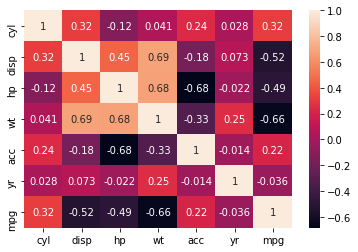

In [115]:
#heatmap
sns.heatmap(df3.corr(), annot=True)
plt.show()

In [116]:
# spitting the dataset 
X_train_df3, X_test_df3, y_train_df3, y_test_df3 = train_test_split(df3_X, df3_y, test_size=0.20, random_state=7)

In [117]:
regression_model_df3 = LinearRegression()
regression_model_df3.fit(X_train_df3, y_train_df3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
coeff_df = pd.DataFrame({'Columns' :df3_X.columns, 'Coefficient' : regression_model_df3.coef_})  
coeff_df

,Columns,Coefficient
0,cyl,9.902142
1,disp,-0.066777
2,hp,-0.017821
3,wt,-0.004688
4,acc,-0.246392
5,yr,0.185620


In [119]:
regression_model_df3.intercept_

-4.556900050583849

In [120]:
#predicting the values
y_pred_df3 = regression_model_df3.predict(X_test_df3)
y_pred_df3

array([24.67933699, 27.09456991, 26.32467462, 26.27437092, 26.29628033,
       24.49678913, 28.08661586, 21.9968371 , 25.47871096, 25.38476064,
       21.90970048, 29.29668132, 26.46057308, 30.19641082, 27.74666114])

In [121]:
# r2 score for the model
scores = cross_val_score(regression_model_df3, X_train_df3, y_train_df3, cv=4)
np.mean(scores)

0.5551928583357173

In [122]:
r2_score(y_test_df3, y_pred_df3)

0.4879113143692503

In [123]:
#comparing the actual vs the predicted
df3_compare = pd.DataFrame({'Actual': y_test_df3, 'Predicted': y_pred_df3})
df3_compare.sample(10)

,Actual,Predicted
110,22.0,24.496789
109,21.0,21.909700
142,26.0,29.296681
145,32.0,28.086616
52,30.0,27.746661
19,26.0,27.094570
132,25.0,21.996837
185,26.0,26.274371
58,25.0,26.324675
84,27.0,26.460573


In [124]:
#evaluate the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_df3, y_pred_df3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_df3, y_pred_df3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_df3, y_pred_df3)))

Mean Absolute Error: 2.1619515629337505
Mean Squared Error: 6.313484506398664
Root Mean Squared Error: 2.5126648217378027


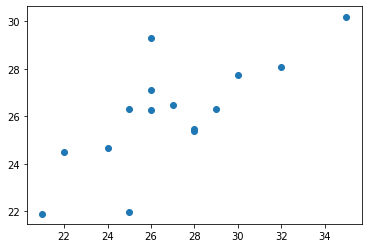

In [125]:
plt.scatter(y_test_df3, y_pred_df3)
plt.show()

In [126]:
X = df_car.drop(['mpg', 'labels'], axis =1)
y = df_car['mpg']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [128]:
Model = LinearRegression()
Model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
y_pred = Model.predict(X_test)
y_pred

array([19.66773362, 30.36106016, 33.31052354, 26.82820726, 30.06928202,
       30.90370192, 22.25065406, 18.80128957, 18.26241009, 17.32866008,
       12.77579596, 24.55268167, 14.94463459, 20.94136503, 24.78272313,
       15.52233348, 33.89225673, 23.31046932, 11.11906266, 19.53546189,
       25.30130483, 32.23376473, 20.11255758, 30.80956238, 17.53076058,
       19.02302784, 32.6870605 , 25.65220179, 16.9185757 , 14.74599362,
       30.91327332, 19.17493481,  7.26589122, 32.54801791, 29.65417239,
       22.07119177, 31.74259037, 22.40047216,  9.82154076, 28.46580452,
       15.49571162, 15.47014797, 28.88909008, 24.2274309 , 33.02126624,
       17.86881022, 16.97810943, 25.98286575, 26.10876335, 16.90746289,
       25.18219199, 22.16952527, 28.66213565, 25.32866279, 11.51199288,
       25.24159696, 28.38379662, 15.48928171, 25.56291969, 29.83090648,
       29.00801414, 34.68931713, 25.23728505, 28.1886918 , 29.32794372,
       25.91285176, 31.5201425 , 11.44289418, 33.4053931 , 32.69

In [130]:
# r2 score for the model
scores = cross_val_score(Model, X_train, y_train, cv=4)
np.mean(scores)

0.8065854960580918

In [131]:
r2_score(y_test, y_pred)

0.8223256837185738

## Clusters compared to single model

In [132]:
## 1. In the single model could see in the heat map high multicolinearity for the features cyl, disp, hp and wt. After clustering each models show lesser multicolinearity for these features.
## 2. The models are now profiled based on the weight of the car. From the dataset we were able to find this hidden pattern and segment the cars based on the weighs.
## 3. Each clusters has their features now with different relationship to the target mpg, compared to the single cluster.
## 4. We can now have the insight of the test car belonging to which cluster, hence increasing the accuracy of the prediction.
## 5. The performance is also increased since now we do not run the whole dataset but rather the cluster to which it belongs to.
## 6. Each model now provides more and distinct understanding of the relationship with the target. Hence each model we can build with the appropriate features proividing more efficient model.
